# Task 3: To Explore Unsupervised Machine Learning

## K-Means Clustering
### From the Iris dataset, predict the optimum number of cluster and represent it visually.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data
data = pd.read_csv("Iris.csv",index_col = 0)

### Exploring the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#### We can see there is no null value

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.groupby('Species').sum()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,250.3,170.9,73.2,12.2
Iris-versicolor,296.8,138.5,213.0,66.3
Iris-virginica,329.4,148.7,277.6,101.3


## Visualising the data

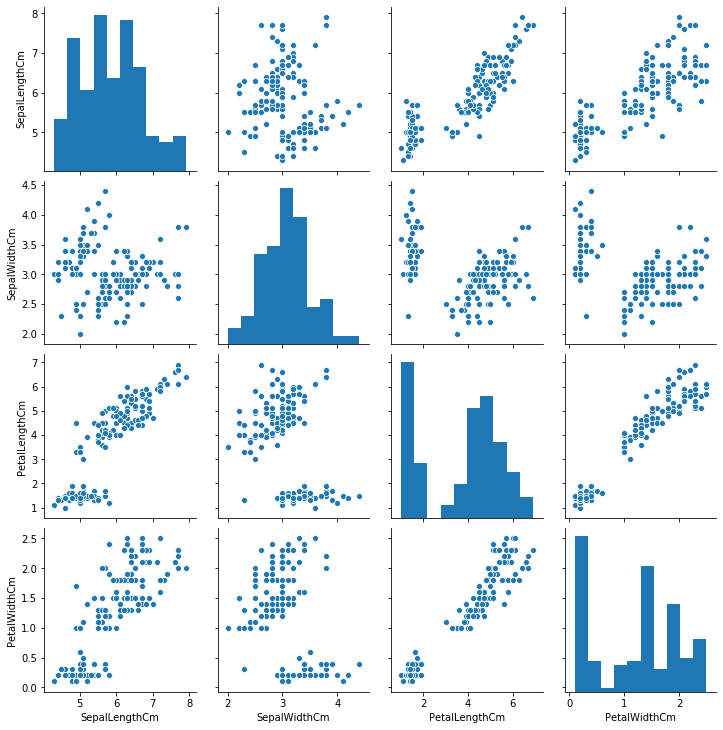

In [6]:
sns.pairplot(data)

## Finding optimum number of clusters for k-means classification

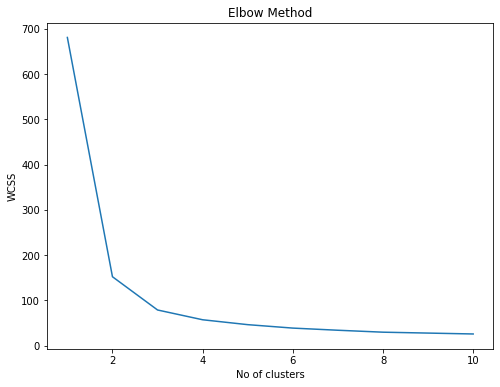

In [7]:
x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel('WCSS')  #Within CLuster Sum of Squares
plt.show()

#### From above elbow curve we can see that 3 Clusters can be formed.

### Applying KMeans to the dataset

In [8]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visulaizing the Clusters on first two columns

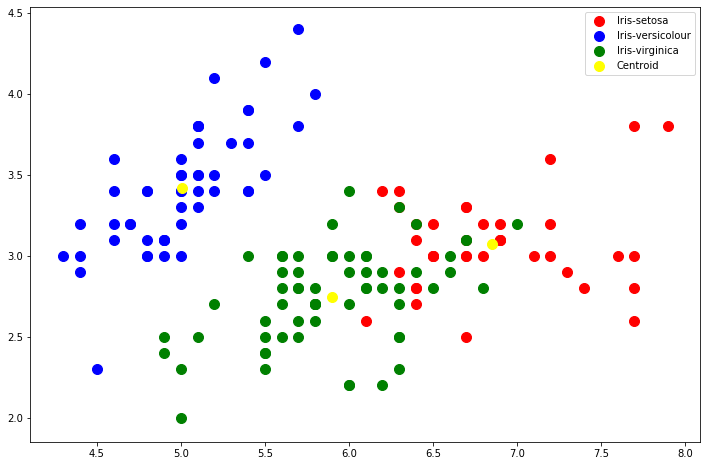

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroid
plt.scatter(kmeans.cluster_centers_[: ,0],kmeans.cluster_centers_[:,1], s = 100 , c = "yellow", label = "Centroid")
plt.legend()